In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_trial_data_df,mouse_drug_data_df,how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_groups = combined_data_df.groupby(['Drug','Timepoint'])
average_tumor_volume_df = drug_groups['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
average_tumor_volume_df = average_tumor_volume_df.reset_index()
# Preview DataFrame
average_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_groups_tumor_vol_df = combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
tumor_standard_error = drug_groups_tumor_vol_df.sem()
#print(tumor_standard_error)
# Convert to DataFrame
tumor_standard_error_df = pd.DataFrame(tumor_standard_error)
# Preview DataFrame
tumor_standard_error_df = tumor_standard_error_df.reset_index()
tumor_standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_tumor_volume_df = average_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')


# Preview that Reformatting worked
drug_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


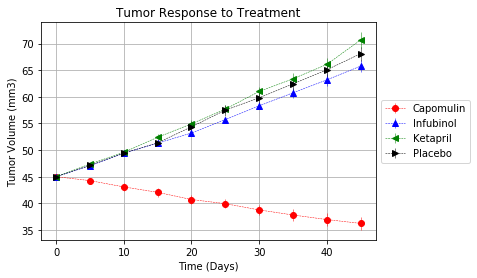

In [5]:
# Generate the Plot (with Error Bars)
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

marker = itertools.cycle(('o', '^', '<', '>'))
colors = itertools.cycle(('red', 'blue', 'green', 'black'))
for drug in drug_list:
    tumor_treatment_plt = plt.errorbar(drug_tumor_volume_df.index,drug_tumor_volume_df[drug],tumor_standard_error[drug],
                                       fmt=next(marker),ls='--',color=next(colors),label=drug, linewidth=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_groups_met_df = combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
average_drug_groups_met_df = drug_groups_met_df.mean()

# Convert to DataFrame
average_drug_groups_met_df = average_drug_groups_met_df.reset_index()
# Preview DataFrame
average_drug_groups_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error = drug_groups_met_df.sem()
# Convert to DataFrame
met_standard_error_df = pd.DataFrame(met_standard_error)
# Preview DataFrame
met_standard_error_df = met_standard_error_df.reset_index()
met_standard_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
drug_met_df = average_drug_groups_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
drug_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


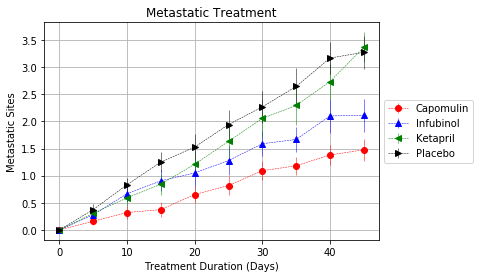

In [9]:
# Generate the Plot (with Error Bars)
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
marker = itertools.cycle(('o', '^', '<', '>'))
colors = itertools.cycle(('red', 'blue', 'green', 'black'))
for drug in drug_list:
    met_treatment_plt = plt.errorbar(drug_met_df.index,drug_met_df[drug],met_standard_error[drug],
                                       fmt=next(marker),ls='--',color=next(colors),label=drug, linewidth=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Metastatic Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.grid()
plt.show()


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_groups_mouse_df = combined_data_df.groupby(['Drug','Timepoint'])['Mouse ID']
drug_mouse_count_df = drug_groups_mouse_df.nunique()
# Convert to DataFrame
drug_mouse_count_df = pd.DataFrame(drug_mouse_count_df)
drug_mouse_count_df.reset_index(inplace=True)
drug_mouse_count_df=drug_mouse_count_df.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
drug_mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
timepoint_drug_mouse_count_df = drug_mouse_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
timepoint_drug_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


10


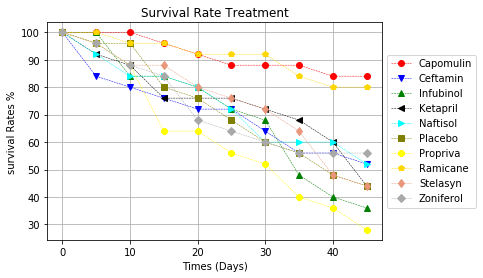

In [31]:
# Generate the Plot (Accounting for percentages)
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
print(len(drug_list))            
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p', 'd','D'))

colors = itertools.cycle(('red', 'blue', 'green', 'black','cyan','olive','yellow','gold','darksalmon','darkgrey'))
for drug in drug_list:
    total_mouse = timepoint_drug_mouse_count_df[drug][0]
    rate = (timepoint_drug_mouse_count_df[drug]/total_mouse)*100
    mouse_count_treatment_plt = plt.plot(timepoint_drug_mouse_count_df.index,rate,
                                       marker=next(marker),ls='--',color=next(colors),label=drug, linewidth=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Survival Rate Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('survival Rates %')
plt.grid()
plt.show()

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)